# NumPy
First off, let's discuss NumPy

In [1]:
%%time
# We don't use tuples and lists for big numerical datasets like images...
x = list(range(1, 1000000, 1))  # list of numbers
y = []             # y is an empty list
for i in x:        # loop over the items in x
    y.append(i**2) # square the item and append to list

CPU times: user 261 ms, sys: 26.7 ms, total: 288 ms
Wall time: 289 ms


That was pretty slow. More importantly, you have to multiply element-wise with a loop! NumPy avoids that and is much faster and more flexible.

In [2]:
%%time
import numpy as np        # NumPy array math package
x = np.arange(1, 1000000, 1)
y = x**2

CPU times: user 199 ms, sys: 721 ms, total: 920 ms
Wall time: 122 ms


In [3]:
# We can access elements in a numpy arrary easily
x[2]

3

In [4]:
x[0:10]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [5]:
x[0:10:2] # change the step!

array([1, 3, 5, 7, 9])

In [6]:
np.where(x<10) # indices where True

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),)

In [7]:
x[np.where(x<10)] # use them to slice an array

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
m = x < 10
m  # boolean array

array([ True,  True,  True, ..., False, False, False])

In [9]:
x[m]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
x[~m]  # negation of boolean values

array([    10,     11,     12, ..., 999997, 999998, 999999])

In [11]:
x[m].mean()  # use boolean masks to operate on regions of an array!

5.0

## Broadcasting
 If the arrays are compatible (same shape) except that one or more dimensions is missing, it "broadcasts" over the mission dimensions:

In [12]:
x = np.arange(80)
newshape = (8, 10)
x.shape = newshape
z = x[0]
z

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
x

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79]])

In [14]:
x - z  # broadcast over the extra dimesions!

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
       [30, 30, 30, 30, 30, 30, 30, 30, 30, 30],
       [40, 40, 40, 40, 40, 40, 40, 40, 40, 40],
       [50, 50, 50, 50, 50, 50, 50, 50, 50, 50],
       [60, 60, 60, 60, 60, 60, 60, 60, 60, 60],
       [70, 70, 70, 70, 70, 70, 70, 70, 70, 70]])

# SciPy
Let's do a simple integration example

Take $\int_0^1 x^2 dx$.

This is equal to $\tfrac{1}{3}$

Let's see how to do it numerically with SciPy

In [15]:
from scipy.integrate import quad

def integrand(x):
    return x**2

ans, err = quad(integrand, 0, 1)
ans  # this is 1/3 to machine precision

0.33333333333333337

In [16]:
# what about the error?
err

3.700743415417189e-15

# Matplotlib
Let's plot a sine function

In [17]:
import matplotlib.pyplot as plt  # load plotting module

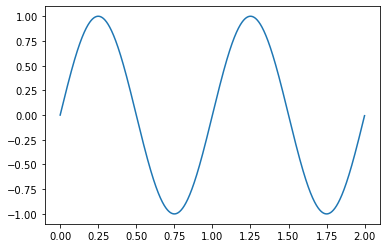

In [18]:
# this is Jupyter notebook specific. In a normal interactive shell, set `plt.ion()`
%matplotlib inline 

# the basic plot
t = np.arange(0.0, 2.0, 0.001)

s = np.sin(2. * np.pi * t)
plt.plot(t, s)

The above plot is pretty bad. We don't have any axis labels or titles. Let's see how we could do that

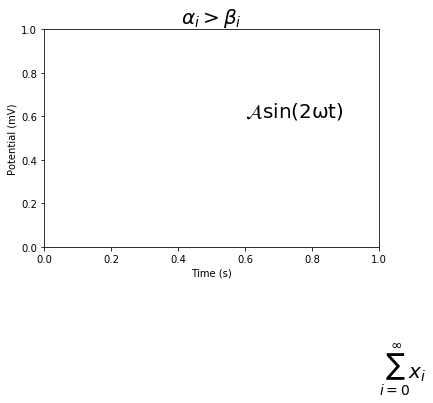

In [19]:
# make the plot informative
plt.title(r'$\alpha_i > \beta_i$', fontsize=20)  # set title, notice the LaTeX!!!
plt.xlabel('Time (s)')  # set xlabel
plt.ylabel('Potential (mV)')  # set ylabel
plt.text(1, -0.6, r'$\sum_{i=0}^\infty x_i$', fontsize=20)  # add text 
plt.text(0.6, 0.6, r'$\cal{A}\rm{sin}(2 \omega t)$', 
     fontsize=20)  # add text
plt.savefig('mathtext_tut', dpi=50)  # save as png by default
plt.savefig('mathtext_tut.pdf', dpi=50)  # save as pdf, svg, jpg, etc.

Text(0.5, 1.0, 'Histogram of a Gaussian Distribution')

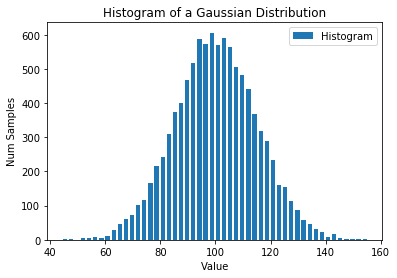

In [20]:
# Make a histogram of a Gaussian distribution
# from http://stackoverflow.com/questions/5328556/histogram-matplotlib

mu    =   100.  # mean (center) of distribution
sigma =    15.  # width of distribution
N     = 10000   # number of samples
bins  =    50   # number of bins
span  =     0.7 # parameter for width of plot


x          = mu + sigma * np.random.randn(N)  # generate the random distribution
hist, bins = np.histogram(x, bins=bins)       # calculate the histogram and binning
width      = span * (bins[1] - bins[0])       # look for the permanent location
center     = (bins[:-1] + bins[1:]) / 2       # GO!

plt.bar(center, hist, align='center', width=width, label='Histogram')
plt.legend(loc='best')  # we can add a legend to the plot using the labels!!  
plt.xlabel("Value")
plt.ylabel("Num Samples")
plt.title("Histogram of a Gaussian Distribution")
